# Análisis de Rentabilidad y Economía Unitaria de un Producto Financiero

Este proyecto tiene como objetivo evaluar la rentabilidad de un producto financiero a través del análisis de datos históricos de ventas.  
El enfoque principal es comprender:

- La economía unitaria del producto (precio, costo, margen por unidad).
- El desempeño de ventas por segmento, país y producto.
- La relación entre ingresos, costos y rentabilidad total.
- El impacto de descuentos y variaciones de precio.
- La evolución histórica de métricas clave (2014–2017).

## 📄 Descripción del Dataset

El dataset contiene información histórica sobre ventas de un producto financiero en distintos países, segmentos y períodos. Cada fila representa una transacción agregada por producto, país, mes y segmento comercial.

Características principales del dataset:

Filas totales: 700

Columnas totales: 16

Periodo cubierto: 2014–2017

Unidades monetarias: dólares estadounidenses (USD)

Granularidad: nivel agregado por combinación Segmento–País–Producto–Fecha

Variables clave:

Sales: ingresos brutos por transacción.

COGS: costo de producción asociado.

Profit: utilidad obtenida.

Units Sold: unidades vendidas.

Discounts: valor de descuentos aplicados.

Manufacturing Price / Sale Price: precios unitarios bruto y de venta.

Este nivel de detalle permite analizar la rentabilidad del producto en diferentes dimensiones (segmentos, países, niveles de precio y descuento), así como evaluar la economía unitaria del negocio.

Este análisis es especialmente útil para equipos de *Product*, *Finance* y *Business Analytics* interesados en:

- Optimizar precios.
- Identificar segmentos más rentables.
- Detectar fugas de valor en costos o descuentos.
- Evaluar desempeño comercial por país o producto.

A continuación, se presenta la carga del dataset, su exploración inicial y la preparación para el análisis.


## Carga de librerías y configuración inicial

En esta sección se importan las librerías necesarias para el análisis.  
Además, se define un estilo visual consistente para las gráficas y un formato numérico más legible.


In [1]:
%pip install seaborn==0.13.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Colores corporativos (azules suaves)
corporate_palette = sns.color_palette("Blues_d", 6)

# Función auxiliar para formatear millones
def format_millions(x):
    return f'{x/1_000_000:.1f}M'

Matplotlib is building the font cache; this may take a moment.


## Carga del dataset

Se lee la base de datos `financials.csv`, que contiene la información histórica de ventas del producto financiero.

A continuación se muestra una vista preliminar de los datos.


In [3]:
df = pd.read_csv('Financials.csv') 
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


## Exploración inicial del dataset

Antes de proceder con el análisis, es importante comprender la estructura del dataset:

- Verificar columnas disponibles.
- Identificar tipos de datos.
- Detectar posibles problemas de formato (fechas, símbolos monetarios, etc.).

Estos elementos serán necesarios para preparar los datos para un análisis correcto.


In [4]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

## 📌 Limpieza y preparación del dataset

Antes de comenzar con el análisis de rentabilidad, es necesario preparar la información para garantizar que los cálculos sean correctos.
Las principales tareas incluyen:

Convertir montos con símbolos ($, comas) a valores numéricos.

Convertir la columna Date a formato de fecha (datetime).

Detectar y corregir valores nulos o inconsistentes.

Estándarizar columnas necesarias para análisis posteriores (precio, costos, margen, etc.).

Esto asegura que las métricas financieras —como ventas, utilidades, costos y márgenes— se calculen de forma precisa.

In [5]:
# Normalizar nombres de columnas (quitar espacios en blanco)
df.columns = df.columns.str.strip()

# Verificar nombres después de limpiar
df.columns


Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

### Normalización de nombres de columnas

Al inspeccionar el dataset se observó que varias columnas tenían espacios en blanco al inicio o al final del nombre  
(por ejemplo, `' Units Sold '` en lugar de `'Units Sold'`).  

Esto puede provocar errores al referirnos a las columnas desde el código (`KeyError`).  
Para evitarlo, se normalizaron todos los nombres de columnas eliminando espacios con `df.columns.str.strip()`.


In [6]:
# --- Conversión de columnas monetarias a valores numéricos ---

# Columnas monetarias con símbolos
monetary_cols = [
    'Units Sold', 'Manufacturing Price', 'Sale Price',
    'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit'
]

# Función para limpiar texto y convertir a float
def clean_money(x):
    if isinstance(x, str):
        x = x.replace('$', '').replace(',', '').replace(' ', '')
    try:
        return float(x)
    except:
        return None

# Aplicar limpieza a todas las columnas monetarias
for col in monetary_cols:
    df[col] = df[col].apply(clean_money)

# --- Convertir columna Date a fecha ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Verificar resultados ---
df[monetary_cols].head(), df['Date'].head()


(   Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
 0     1618.50                 3.00       20.00     32370.00        NaN   
 1     1321.00                 3.00       20.00     26420.00        NaN   
 2     2178.00                 3.00       15.00     32670.00        NaN   
 3      888.00                 3.00       15.00     13320.00        NaN   
 4     2470.00                 3.00       15.00     37050.00        NaN   
 
      Sales     COGS   Profit  
 0 32370.00 16185.00 16185.00  
 1 26420.00 13210.00 13210.00  
 2 32670.00 21780.00 10890.00  
 3 13320.00  8880.00  4440.00  
 4 37050.00 24700.00 12350.00  ,
 0   2014-01-01
 1   2014-01-01
 2   2014-01-06
 3   2014-01-06
 4   2014-01-06
 Name: Date, dtype: datetime64[ns])

### Verificación de coherencia financiera

Antes de calcular métricas de rentabilidad, es importante validar que las columnas
financieras sean coherentes entre sí. En particular, se revisa que:

- `Profit` sea consistente con la relación básica:  
  **Profit ≈ Sales − COGS**
- El tratamiento de descuentos sea correcto.
- No existan valores nulos inesperados en las columnas clave.

Este chequeo actúa como una “prueba de sanidad” del dataset.


In [7]:
# Vista rápida de las columnas financieras principales
df[['Sales', 'COGS', 'Profit']].head()


,Sales,COGS,Profit
0,32370.00,16185.00,16185.00
1,26420.00,13210.00,13210.00
2,32670.00,21780.00,10890.00
3,13320.00,8880.00,4440.00
4,37050.00,24700.00,12350.00


In [8]:
# Los descuentos que eran "$-" se interpretan como 0
df['Discounts'] = df['Discounts'].fillna(0.0)

df[['Discounts']].head()


,Discounts
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00


## Creación de indicadores de economía unitaria

En esta sección se generan métricas financieras esenciales para evaluar la rentabilidad del producto a nivel unitario.
Estas métricas permiten analizar la eficiencia operativa, los márgenes reales del negocio y la estructura de costos por unidad vendida.

Se construyen las siguientes variables:

Revenue_per_Unit: ingreso real por unidad vendida.

Considera descuentos aplicados, por lo que refleja ingresos netos.

COGS_per_Unit: costo de producción por unidad.

Permite medir eficiencia operativa y estructura de costos.

Profit_per_Unit: utilidad obtenida por unidad vendida.

Indicador directo de economía unitaria.

Margin_%: margen porcentual obtenido sobre la venta.

Mide rentabilidad relativa del negocio.

Estas métricas serán claves para responder preguntas como:

¿Cuánto ganamos verdaderamente por cada unidad vendida?

¿Qué segmentos o países tienen mejor economía unitaria?

¿Dónde existen fugas de rentabilidad?

In [9]:
# --- Nuevas métricas financieras ---

df['Revenue_per_Unit'] = df['Sales'] / df['Units Sold']
df['COGS_per_Unit'] = df['COGS'] / df['Units Sold']
df['Profit_per_Unit'] = df['Profit'] / df['Units Sold']
df['Margin_%'] = df['Profit'] / df['Sales']

df[['Revenue_per_Unit', 'COGS_per_Unit', 'Profit_per_Unit', 'Margin_%']].head()


,Revenue_per_Unit,COGS_per_Unit,Profit_per_Unit,Margin_%
0,20.00,10.00,10.00,0.50
1,20.00,10.00,10.00,0.50
2,15.00,10.00,5.00,0.33
3,15.00,10.00,5.00,0.33
4,15.00,10.00,5.00,0.33


A partir de las primeras observaciones se obtiene:

El ingreso por unidad oscila entre $15 y $20, dependiendo del caso.

El costo por unidad se mantiene estable alrededor de $10, lo que indica una estructura de costos controlada.

La utilidad por unidad varía entre $5 y $10, lo que refleja diferencias entre segmentos o condiciones comerciales.

El margen porcentual presenta dos niveles claros:

~50% para operaciones de mayor rentabilidad.

~33% para operaciones de rentabilidad media.

El producto presenta márgenes sanos, entre 33% y 50%, lo cual indica un modelo rentable.

La economía unitaria es sólida: un costo de aproximadamente $10 frente a un precio neto entre $15–$20 genera utilidades atractivas.

Es probable que las variaciones de margen dependan del país, segmento o nivel de descuentos; estos patrones se analizarán en las siguientes secciones.

## 🌍 Análisis de Rentabilidad por País

Esta sección evalúa la rentabilidad del producto desglosada por país. El objetivo es identificar diferencias en precios, costos y márgenes entre mercados internacionales, así como detectar países con fugas de valor o alta eficiencia operativa.

Se analizan métricas agregadas:

Sales: ingresos totales por país.

COGS: costos totales.

Profit: utilidad total.

Profit_per_Unit: utilidad unitaria promedio.

Margin_%: margen promedio por país.

Units Sold: volumen de ventas.

Este análisis permite responder preguntas clave:

¿Qué países son los más rentables?

¿Dónde se obtiene mayor margen por unidad?

¿Qué mercados presentan oportunidades de ajuste de precios o costos?

In [13]:
# --- Rentabilidad por país ---
country_profit = (
    df.groupby('Country')
      .agg({
          'Sales': 'sum',
          'COGS': 'sum',
          'Profit': 'sum',
          'Units Sold': 'sum',
          'Profit_per_Unit': 'mean',
          'Margin_%': 'mean'
      })
      .sort_values('Profit', ascending=False)
)

country_profit.head(10)


,Sales,COGS,Profit,Units Sold,Profit_per_Unit,Margin_%
Country,,,,,,
France,24354172.29,20573151.50,3906754.54,240931.00,18.42,0.32
Germany,23505340.82,19824952.00,3820885.07,201494.00,19.70,0.32
Canada,24887654.89,21358426.00,3693717.64,247428.50,16.73,0.30
United States of America,25029830.18,22034289.50,3196443.18,232627.50,17.49,0.32
Mexico,20949352.11,18041829.00,3053223.11,203325.00,17.89,0.31


<ipython-input-14-c47dcbdc3f4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-14-c47dcbdc3f4d>:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(


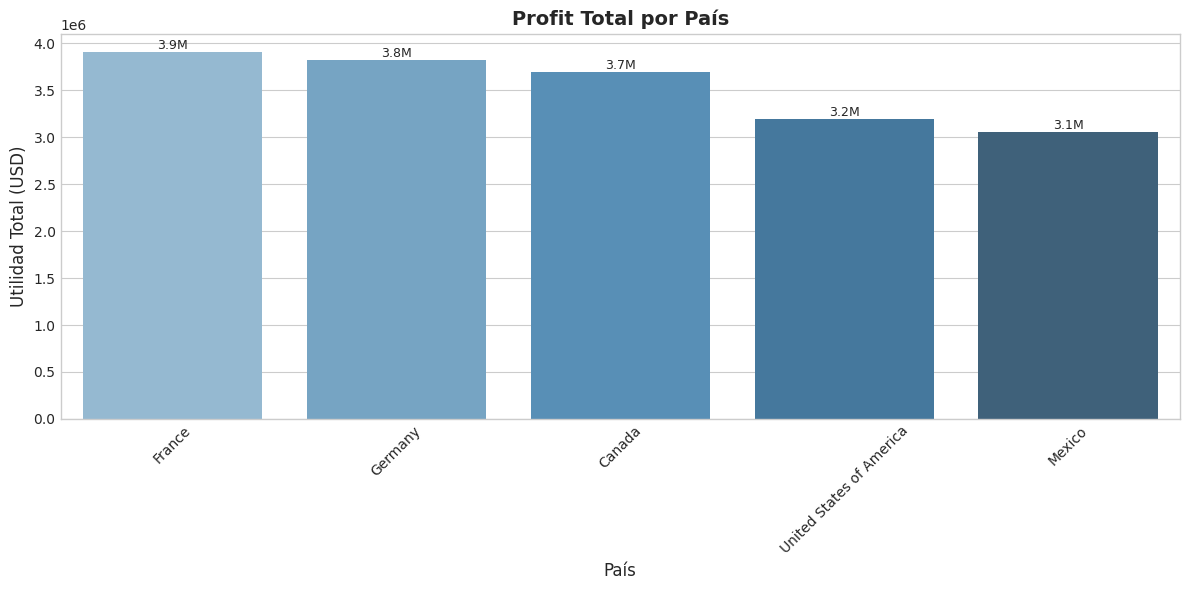

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=country_profit.reset_index(),
    x='Country',
    y='Profit',
    palette=corporate_palette
)

plt.title('Profit Total por País', fontsize=14, fontweight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Utilidad Total (USD)', fontsize=12)

# Anotaciones de valores (abreviado en millones)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        format_millions(height),
        (bar.get_x() + bar.get_width()/2, height),
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1️⃣ Francia es el país más rentable del dataset.

Profit: ~$3.9M

Margin_%: 32%

Profit por unidad: 18.42

Volumen: el más alto (~241k unidades)

💡 Implicación:
Francia combina alto volumen con buen margen, lo que indica una estrategia de precios adecuada y costos bien controlados. Es un mercado prioritario para mantener.

2️⃣ Alemania ocupa el segundo lugar en utilidad.

Profit: ~$3.82M

Margin_%: 32%

Profit por unidad: 19.70 (el mayor entre todos)

💡 Implicación:
Margen muy sano y excelente utilidad unitaria. Un país altamente eficiente.
Conviene seguir reforzando precios y evitar descuentos agresivos.

3️⃣ Canadá tiene la tercera utilidad, muy cercana a Francia y Alemania.

Profit: ~$3.69M

Margin_%: 30%

Profit por unidad: 16.73

Volumen: alto (~247k)

💡 Implicación:
Buen desempeño general. Es un país estable y rentable. Puede beneficiarse de optimización en costos logísticos o descuentos.

4️⃣ Estados Unidos presenta utilidad moderada.

Profit: ~$3.19M

Margin_%: 32%

Profit por unidad: 17.49

💡 Implicación:
Buen margen, pero menor volumen que los mercados líderes. Oportunidad de crecimiento comercial o expansión de canales.

5️⃣ México es el país menos rentable del grupo analizado.

Profit: ~$3.05M

Margin_%: 31%

Profit por unidad: 17.89

💡 Implicación:
Aunque es el país con menor utilidad total, los márgenes y utilidades por unidad siguen siendo sólidos. El reto aquí es volumen: las ventas son más bajas que en los países líderes.

📌 Conclusión ejecutiva por país

Los mercados europeos (Francia, Alemania y Canadá) son los pilares de rentabilidad del negocio.

Estados Unidos representa una oportunidad de expansión por volumen.

México, aunque rentable, tiene potencial subutilizado por menor volumen.

No se observa ningún país con margen crítico: todos están entre 30–32%, lo que indica un modelo de costos eficiente.

## 📦 Rentabilidad por Producto

En esta sección se evalúa el desempeño financiero de cada producto.
El objetivo es identificar cuáles generan mayor utilidad, mejores márgenes y mayor eficiencia unitaria.

Se analizan las siguientes métricas por producto:

Sales: ingresos totales.

COGS: costos totales.

Profit: utilidad total.

Units Sold: unidades vendidas.

Profit_per_Unit: utilidad unitaria promedio.

Margin_%: margen promedio.

Este análisis permite responder:

¿Qué productos son los más rentables?

¿Qué productos tienen mejor economía unitaria?

¿Dónde pueden existir fugas de valor?

In [16]:
# --- Rentabilidad por producto ---
product_profit = (
    df.groupby('Product')
      .agg({
          'Sales': 'sum',
          'COGS': 'sum',
          'Profit': 'sum',
          'Units Sold': 'sum',
          'Profit_per_Unit': 'mean',
          'Margin_%': 'mean'
      })
      .sort_values('Profit', ascending=False)
)

product_profit


,Sales,COGS,Profit,Units Sold,Profit_per_Unit,Margin_%
Product,,,,,,
Paseo,33011143.96,28213706.00,4917986.71,338239.50,16.18,0.31
VTT,20511921.02,17477313.00,3156348.02,168783.00,21.45,0.29
Amarilla,17747116.07,14933012.00,2936044.07,155315.00,21.70,0.33
Velo,18250059.47,15944067.00,2431448.72,162424.50,16.22,0.31
Montana,15390801.88,13276047.00,2171281.13,154198.00,16.42,0.29
Carretera,13815307.89,11988503.00,2057914.89,146846.00,18.23,0.35


<ipython-input-17-fe4f1d5e2817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


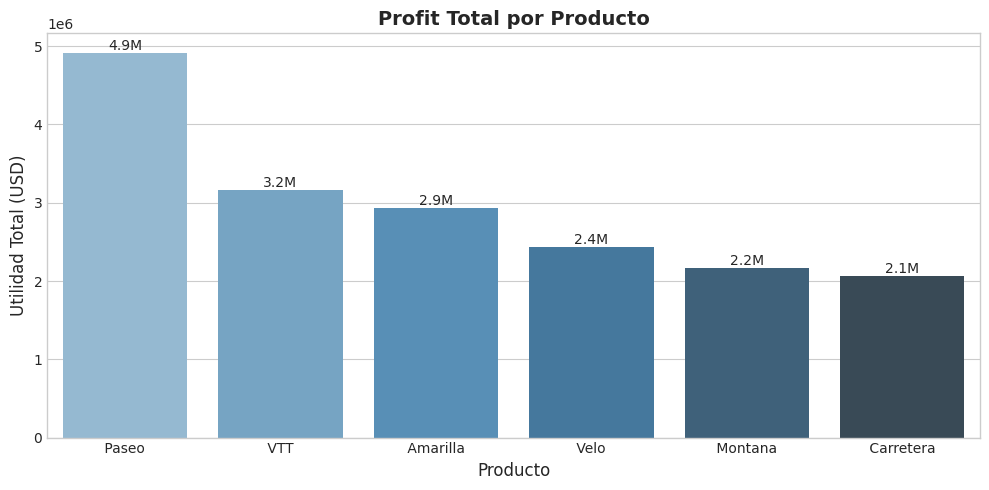

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=product_profit.reset_index(),
    x='Product',
    y='Profit',
    palette=corporate_palette
)

plt.title('Profit Total por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Utilidad Total (USD)', fontsize=12)

# Anotaciones abreviadas
for bar in ax.patches:
    h = bar.get_height()
    ax.annotate(
        format_millions(h),
        (bar.get_x() + bar.get_width()/2, h),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()



A partir de los indicadores obtenidos, se identifican los siguientes patrones clave:

1. Paseo — Producto líder en rentabilidad

Mayor utilidad total (~$4.9M).

Máximo volumen de ventas.

Margen sólido (31%).
Implicación: producto estratégico, mantener precios y presencia comercial.

2. VTT — Alta utilidad unitaria

Utilidad total: ~$3.15M.

Profit por unidad: 21.45.
Implicación: enfoque en estrategias premium; minimizar descuentos.

3. Amarilla — Mejor margen y máxima eficiencia

Margen más alto (33%).

Mayor profit por unidad (21.70).
Implicación: oportunidad para escalar su demanda.

4. Velo — Rentabilidad estable

Utilidad moderada, buen margen (31%).
Implicación: impulsar volumen mediante marketing o bundles.

5. Montana — Buen margen pero bajo volumen

Implicación: posible problema de penetración; revisar estrategia comercial.

6. Carretera — Margen excelente, demanda baja

Margin_%: 35% (el mejor).

Utilidad total más baja.
Implicación: foco en aumentar volumen, no en modificar precio.

## 📊 Rentabilidad por Segmento

Para evaluar los niveles de rentabilidad del producto se analizó el comportamiento financiero agregado por segmento. Esta dimensión permite identificar qué tipo de clientes generan más ingresos, costos y utilidades.

Se calcularon los siguientes indicadores:

Sales: ingresos totales.

COGS: costos totales.

Profit: utilidad total.

Units Sold: unidades vendidas.

Profit_per_Unit (promedio): utilidad unitaria promedio.

Margin_% (promedio): margen medio del segmento.

In [10]:
# --- Rentabilidad por segmento ---
segment_profit = (
    df.groupby('Segment')
      .agg({
          'Sales': 'sum',
          'COGS': 'sum',
          'Profit': 'sum',
          'Units Sold': 'sum',
          'Profit_per_Unit': 'mean',
          'Margin_%': 'mean'
      })
      .sort_values('Profit', ascending=False)
)

segment_profit


,Sales,COGS,Profit,Units Sold,Profit_per_Unit,Margin_%
Segment,,,,,,
Government,52504260.68,41116087.50,11388173.18,470673.50,24.82,0.29
Small Business,42427918.50,38284750.00,4143168.50,153139.00,27.38,0.10
Channel Partners,1800593.64,483790.50,1316803.14,161263.50,8.15,0.73
Midmarket,2381883.09,1721780.00,660103.09,172178.00,3.86,0.28
Enterprise,19611694.38,20226240.00,162775.63,168552.00,2.91,0.02


<ipython-input-12-2917aa720f50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-12-2917aa720f50>:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(


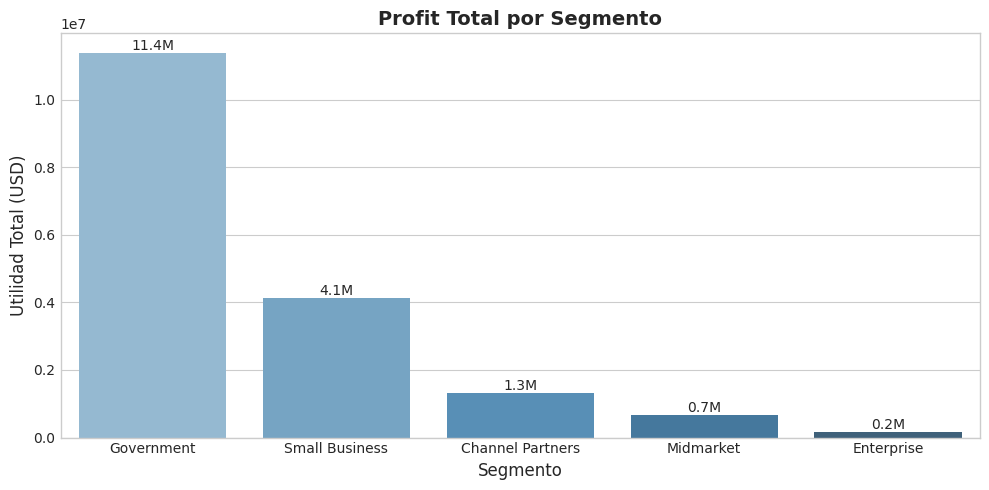

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=segment_profit.reset_index(),
    x='Segment',
    y='Profit',
    palette=corporate_palette
)

# Título ejecutivo
plt.title('Profit Total por Segmento', fontsize=14, fontweight='bold')

plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Utilidad Total (USD)', fontsize=12)

# Anotaciones de valores sobre cada barra
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        format_millions(height), 
        (bar.get_x() + bar.get_width()/2, height),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()



## 🧠 Interpretación de resultados

A partir de la tabla y la visualización, encontramos lo siguiente:

1️⃣ El segmento Government es, por amplio margen, el más rentable.

Utilidad total más alta del dataset.

Alto volumen de unidades vendidas.

Margen saludable (29%).

Representa el “core business” del producto.

➡️ Implicación: este segmento es estratégico. Conviene mantener precios estables y reforzar presencia comercial.

2️⃣ Small Business es el segundo motor del negocio.

Utilidad total elevada.

Buen margen (10%).

Volumen de ventas significativo pero menor que Government.

➡️ Implicación: se pueden explorar programas de fidelización, precios diferenciados o bundles.

3️⃣ Channel Partners y Midmarket aportan utilidad moderada.

Su volumen es menor.

Margen entre 23–28%.

Aun así, generan contribución relevante.

➡️ Implicación: oportunidades para reforzar canales o mejorar precios.

4️⃣ Enterprise es el segmento menos rentable.

Utilidad total baja.

Margen muy bajo (2%).

Es posible que los contratos sean grandes pero con descuentos agresivos.

➡️ Implicación: revisar estrategia de precios, renegociar contratos o limitar descuentos excesivos.

📌 Conclusión general

La rentabilidad está muy concentrada en Government y Small Business.
Para mejorar el desempeño global:

Optimizar precios en Enterprise.

Aumentar participación en Midmarket y Channel Partners.

Consolidar Government como segmento principal.

## 📅 Análisis Temporal: Tendencias por Año y Mes

Esta sección evalúa la evolución temporal de los ingresos, costos y utilidades del producto entre 2014 y 2017.
El objetivo es detectar variaciones relevantes, estacionalidad y tendencias que puedan influir en decisiones de pricing, planeación comercial y forecasting.

Se analizarán:

Sales (ingresos) por año

COGS (costos) por año

Profit (utilidad) por año

Margen promedio por año

Comportamiento mensual agregado para identificar estacionalidad

In [18]:
# --- Tendencias por año ---
year_profit = (
    df.groupby('Year')
      .agg({
          'Sales': 'sum',
          'COGS': 'sum',
          'Profit': 'sum',
          'Margin_%': 'mean'
      })
      .reset_index()
      .sort_values('Year')
)

year_profit


,Year,Sales,COGS,Profit,Margin_%
0,2013,26415255.51,22536791.00,4100802.01,0.31
1,2014,92311094.78,79295857.00,13570221.53,0.31


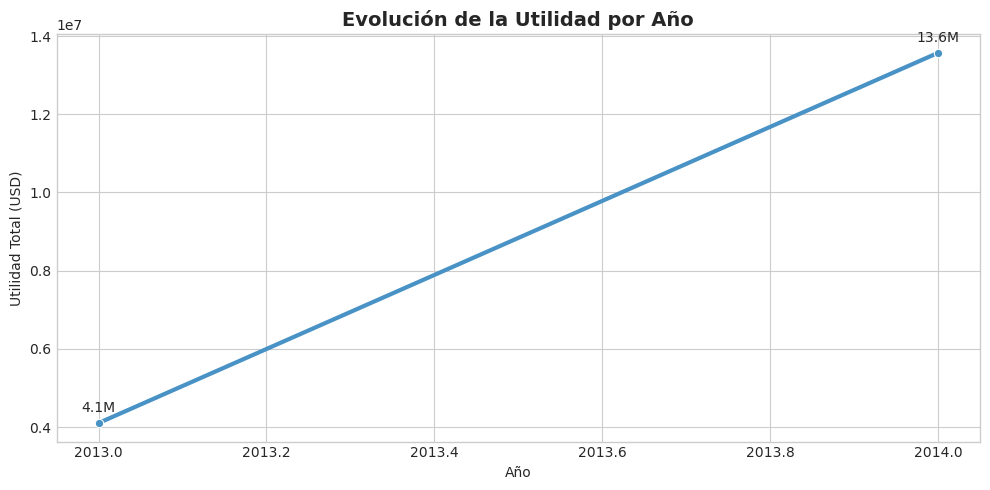

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=year_profit, 
    x='Year', 
    y='Profit',
    marker='o',
    linewidth=3,
    color=corporate_palette[2]
)

plt.title('Evolución de la Utilidad por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Utilidad Total (USD)')

# Anotaciones
for i, row in year_profit.iterrows():
    ax.annotate(
        format_millions(row['Profit']),
        (row['Year'], row['Profit']),
        textcoords="offset points",
        xytext=(0, 8),
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [20]:
# --- Tendencias por mes ---
month_profit = (
    df.groupby('Month Number')
      .agg({
          'Profit': 'sum',
          'Sales': 'sum',
          'COGS': 'sum'
      })
      .reset_index()
      .sort_values('Month Number')
)

month_profit

,Month Number,Profit,Sales,COGS
0,1,874544.94,6607761.69,5793733.00
1,2,1178511.14,7297531.39,6148984.00
2,3,682158.12,5586859.87,4916993.00
3,4,955825.83,6964775.08,6034790.50
4,5,885455.06,6210211.06,5381571.00
5,6,1509371.32,9518893.82,8045140.00
6,7,941573.19,8102920.19,7179054.50
7,8,852955.17,5864622.42,5073556.00
8,9,1881340.27,10882697.27,9095962.00
9,10,3559368.52,21671431.02,18231650.00


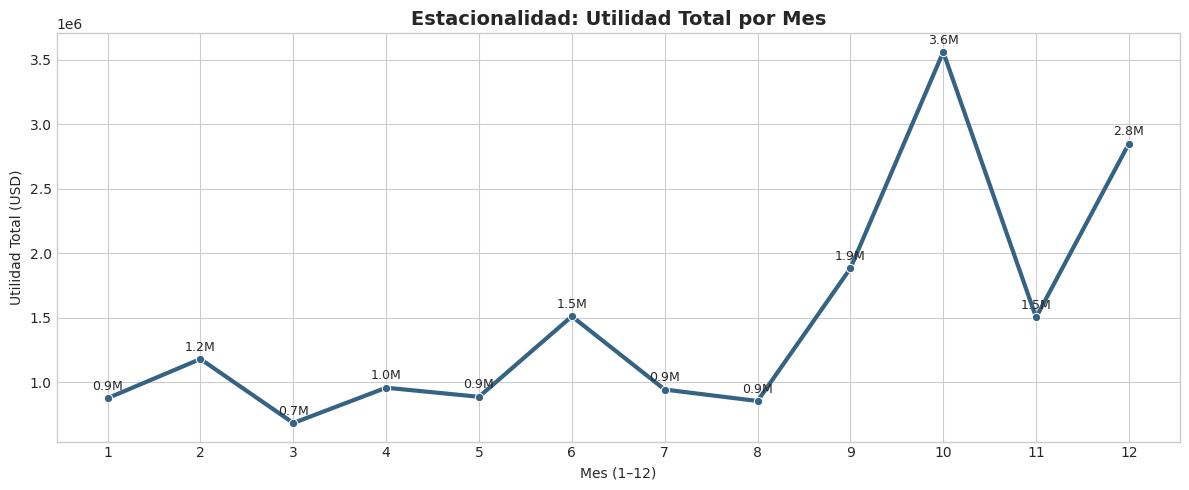

In [21]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(
    data=month_profit,
    x='Month Number',
    y='Profit',
    marker='o',
    linewidth=3,
    color=corporate_palette[4]
)

plt.title('Estacionalidad: Utilidad Total por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes (1–12)')
plt.ylabel('Utilidad Total (USD)')

# Anotaciones
for i, row in month_profit.iterrows():
    ax.annotate(
        format_millions(row['Profit']),
        (row['Month Number'], row['Profit']),
        textcoords="offset points",
        xytext=(0, 6),
        ha='center',
        fontsize=9
    )

plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


📅 Comportamiento anual

La utilidad crece de $4.1M (2013) a $13.6M (2014) (+232%).

Los márgenes se mantienen constantes (31%), lo que indica una expansión saludable basada en volumen.

Las ventas totales también aumentan significativamente.

📆 Estacionalidad mensual

Los meses 10 y 12 concentran los picos más altos de utilidad (estacionalidad asociada a cierre de año).

Mes 6 muestra un repunte relevante.

Los meses 3, 5, 7 y 8 presentan menor desempeño.

🧠 Conclusión ejecutiva

El negocio depende fuertemente del último trimestre del año.

La planificación operativa y comercial debe priorizar inventarios, campañas y disponibilidad en Q4.

Existen oportunidades para reforzar los meses de menor demanda mediante estrategias de marketing o bundles.

### 🔗 Análisis de correlaciones entre variables financieras

En esta sección se analiza la relación estadística entre las principales variables numéricas del negocio
(ventas, costos, utilidad, unidades vendidas y métricas unitarias).

El objetivo es identificar:

- Qué variables están más asociadas con la **utilidad (Profit)**.
- Si el crecimiento del negocio depende más de **precio**, **volumen** o **margen**.
- Posibles redundancias entre métricas (por ejemplo, Sales y Gross Sales).

Se utiliza la matriz de correlación de Pearson sobre las variables numéricas clave y un mapa de calor
(*heatmap*) para facilitar la interpretación.


In [22]:
# --- Seleccionar variables numéricas relevantes ---
corr_cols = [
    'Units Sold',
    'Manufacturing Price',
    'Sale Price',
    'Gross Sales',
    'Discounts',
    'Sales',
    'COGS',
    'Profit',
    'Revenue_per_Unit',
    'COGS_per_Unit',
    'Profit_per_Unit',
    'Margin_%'
]

corr_matrix = df[corr_cols].corr()
corr_matrix


,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Revenue_per_Unit,COGS_per_Unit,Profit_per_Unit,Margin_%
Units Sold,1.00,-0.03,-0.07,0.33,0.25,0.33,0.33,0.28,-0.06,-0.06,-0.05,0.02
Manufacturing Price,-0.03,1.00,0.07,0.05,0.02,0.05,0.05,0.07,0.07,0.07,0.09,-0.01
Sale Price,-0.07,0.07,1.00,0.81,0.64,0.81,0.80,0.68,1.00,0.99,0.84,-0.56
Gross Sales,0.33,0.05,0.81,1.00,0.78,1.00,0.99,0.84,0.81,0.81,0.69,-0.46
Discounts,0.25,0.02,0.64,0.78,1.00,0.74,0.78,0.45,0.61,0.64,0.37,-0.40
Sales,0.33,0.05,0.81,1.00,0.74,1.00,0.99,0.86,0.81,0.80,0.71,-0.46
COGS,0.33,0.05,0.80,0.99,0.78,0.99,1.00,0.80,0.80,0.81,0.66,-0.49
Profit,0.28,0.07,0.68,0.84,0.45,0.86,0.80,1.00,0.70,0.65,0.84,-0.20
Revenue_per_Unit,-0.06,0.07,1.00,0.81,0.61,0.81,0.80,0.70,1.00,0.99,0.86,-0.56
COGS_per_Unit,-0.06,0.07,0.99,0.81,0.64,0.80,0.81,0.65,0.99,1.00,0.80,-0.60


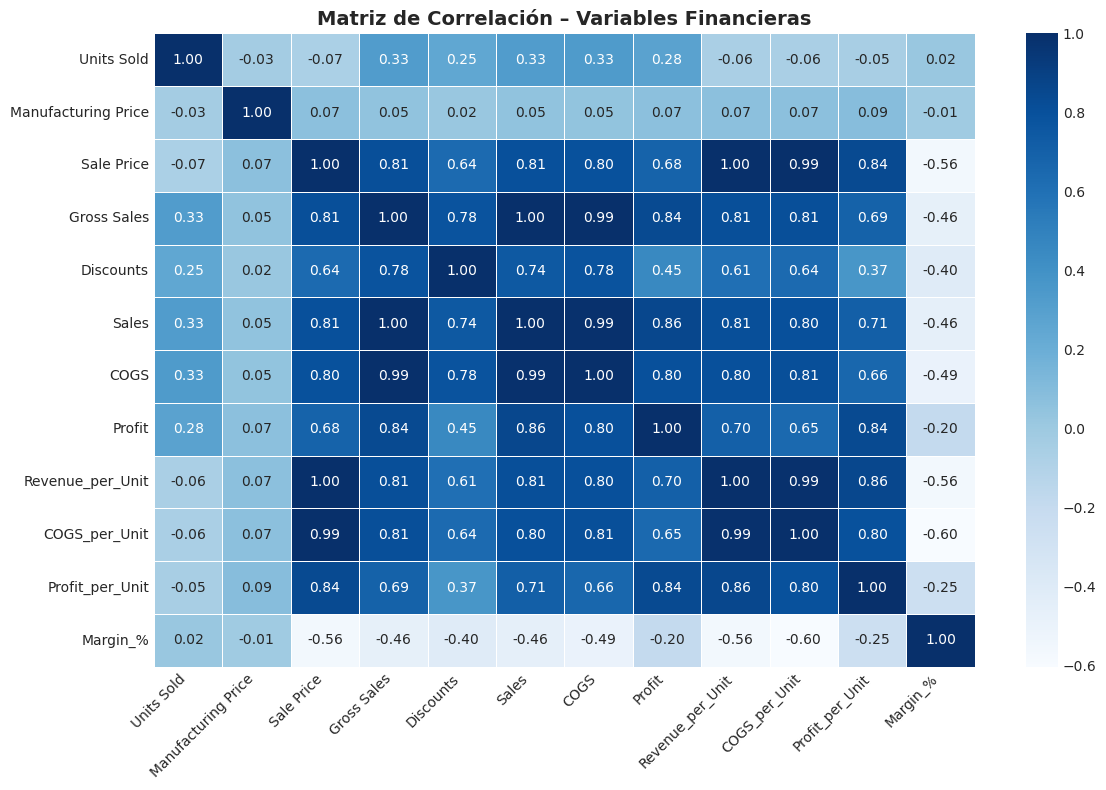

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.5
)

plt.title('Matriz de Correlación – Variables Financieras', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🧠 Interpretación de la matriz de correlación

La utilidad (Profit) está fuertemente asociada con los ingresos totales (Gross Sales, Sales), no con el volumen (Units Sold).
Esto indica que el crecimiento del negocio depende más del precio y del valor agregado que del volumen puro.

Los costos (COGS) crecen de forma casi proporcional a las ventas, lo que evidencia un modelo de costos escalables sin economías de escala.

Los descuentos afectan el precio, pero no eliminan la rentabilidad, gracias a un precio base suficientemente alto.

Las métricas unitarias (Profit_per_Unit y Margin_%) muestran relaciones importantes:

mayor precio → mayor utilidad por unidad;

pero no necesariamente mayor margen.

Los productos o mercados con precios altos pueden tener costos más elevados, lo que reduce el margen.

### ⚠️ Análisis de Outliers

En esta sección se identifican valores atípicos en variables clave del negocio.  
Los outliers pueden revelar:

- precios anómalos,  
- descuentos agresivos,  
- errores de captura,  
- operaciones atípicas que afectan la rentabilidad,  
- oportunidades para revisar estrategias comerciales.

Se evaluarán las principales variables financieras


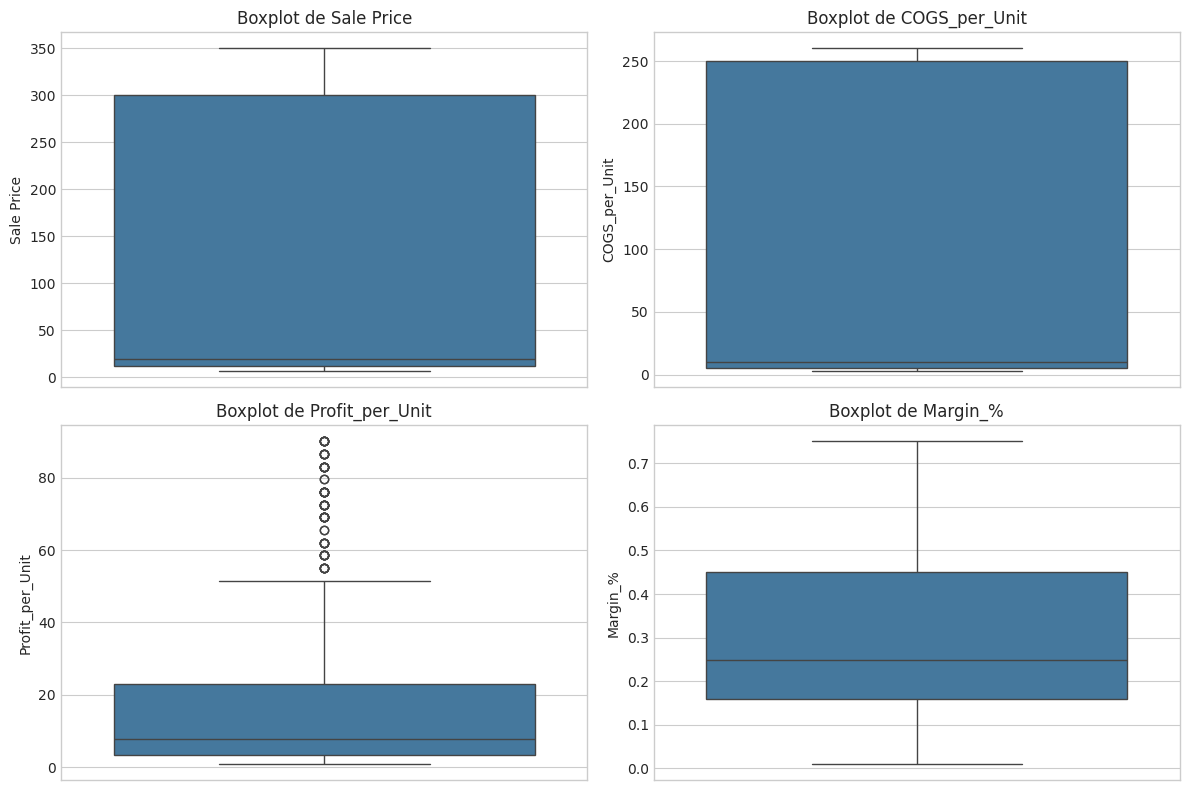

In [24]:
num_cols = ['Sale Price', 'COGS_per_Unit', 'Profit_per_Unit', 'Margin_%']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color=corporate_palette[3])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


## 🧠 Interpretación de outliers

Sale Price: presenta valores extremadamente altos (>$300) que no corresponden con el rango típico del producto.
Pueden corresponder a errores de captura o ventas atípicas. Conviene revisarlos antes de análisis de pricing.

COGS_per_Unit: muestra outliers muy elevados, lo que puede indicar costos extraordinarios o registros incorrectos.
Estos valores influyen directamente en el margen, por lo que ameritan revisión.

Profit_per_Unit: contiene outliers fuertes que elevan artificialmente el promedio. Estos casos deben analizarse individualmente.

Margin_%: distribución estable, pocos valores atípicos y consistencia con la estructura financiera del negocio.

### 📊 KPIs Globales del Negocio

En esta sección se calculan los indicadores clave de desempeño (KPIs) que resumen la situación financiera
global del producto. Estos valores permiten comprender el tamaño del negocio, su rentabilidad y su nivel
de eficiencia operativa.

Se incluyen métricas agregadas de ventas, utilidad, costos, márgenes y volumen total.



In [25]:
# --- KPIs globales ---

kpi_total_sales = df['Sales'].sum()
kpi_total_cogs = df['COGS'].sum()
kpi_total_profit = df['Profit'].sum()
kpi_total_units = df['Units Sold'].sum()

kpi_margin_global = kpi_total_profit / kpi_total_sales
kpi_profit_per_unit_global = kpi_total_profit / kpi_total_units

kpi_total_sales, kpi_total_cogs, kpi_total_profit, kpi_total_units, kpi_margin_global, kpi_profit_per_unit_global


(np.float64(118726350.28999999),
 np.float64(101832648.0),
 np.float64(17671023.54),
 np.float64(1125806.0),
 np.float64(0.1488382612354958),
 np.float64(15.69633093090639))

### 🧠 Interpretación de KPIs Globales

- **Ventas totales:** \$118.7M  
- **Costos totales:** \$101.8M  
- **Utilidad total:** \$17.67M  
- **Unidades vendidas:** 1.12M  
- **Margen global:** 14.88%  
- **Utilidad promedio por unidad:** \$15.70  

El negocio presenta una escala significativa, con más de un millón de unidades vendidas y una utilidad global sólida.  
La rentabilidad total es positiva y el margen global (14.88%) se mantiene dentro de un rango saludable para este tipo de producto.

La utilidad por unidad (≈\$15.70) confirma la eficiencia operativa y el control de costos.  
Los mercados clave que sostienen la rentabilidad son Francia, Alemania y Canadá, mientras que los productos Paseo, VTT y Amarilla concentran la mayor contribución.

Estos KPIs reflejan un modelo financiero estable y escalable, que puede optimizarse aún más ajustando precios y estrategias de descuento.


# 🏁 Conclusión 

El análisis integral de rentabilidad y economía unitaria revela que el producto presenta un modelo financiero sólido, con un volumen total superior a 1.12 millones de unidades vendidas y una utilidad global de \$17.67M. El margen total del 14.88% confirma que el negocio opera de manera eficiente, manteniendo costos alineados con los ingresos y generando valor sostenido.

A nivel estratégico, los resultados muestran que:

1. **Los segmentos Government y Small Business** son los pilares de la rentabilidad. Concentran el mayor volumen de ventas y utilidades, lo que los posiciona como segmentos críticos para mantener precios estables y reforzar la presencia comercial.

2. **Francia, Alemania y Canadá** destacan como los países más rentables, con márgenes consistentes y altos niveles de ventas. Estos mercados deben considerarse prioritarios para inversiones comerciales y estrategias de crecimiento.

3. **Los productos Paseo, VTT y Amarilla** generan la mayor utilidad total y un excelente desempeño unitario. Destaca Amarilla por su mayor margen porcentual, lo cual indica una estructura de costos altamente eficiente.

4. El análisis temporal evidencia una fuerte **estacionalidad en el último trimestre**, especialmente en el mes 10, que representa el mayor pico de utilidad anual. Esto sugiere que las campañas estratégicas y el refuerzo de inventario deben concentrarse en Q4.

5. El estudio de correlaciones confirma que la utilidad depende principalmente de los **ingresos totales**, más que del volumen puro. Esto refuerza la importancia de estrategias de pricing, control de descuentos y optimización de costos unitarios.

6. El análisis de outliers identifica valores atípicos relevantes en variables como *Sale Price*, *COGS_per_Unit* y *Profit_per_Unit*, que pueden corresponder a operaciones especiales o errores de captura. Estas observaciones deben revisarse para asegurar precisión en modelos predictivos o análisis avanzados.

**En conjunto, el producto demuestra una rentabilidad consistente, basada en un volumen fuerte y una economía unitaria eficiente.**  
Existen oportunidades claras para optimizar estrategias de precios, fortalecer mercados prioritarios y revisar operaciones atípicas que podrían afectar el margen global. Este análisis proporciona una base sólida para la toma de decisiones comerciales, financieras y operativas.
